ENCODE

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.5221 - acc: 0.4440 - val_loss: 0.4277 - val_acc: 0.4889
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3935 - acc: 0.4911 - val_loss: 0.3788 - val_acc: 0.4883
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.3705 - acc: 0.4942 - val_loss: 0.3648 - val_acc: 0.4970
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3574 - acc: 0.4968 - val_loss: 0.3538 - val_acc: 0.4925
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3458 - acc: 0.4989 - val_loss: 0.3450 - val_acc: 0.5011


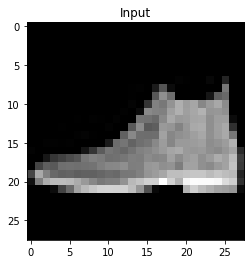

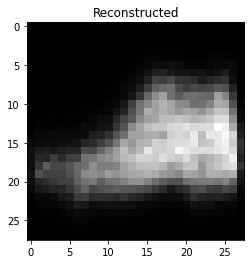

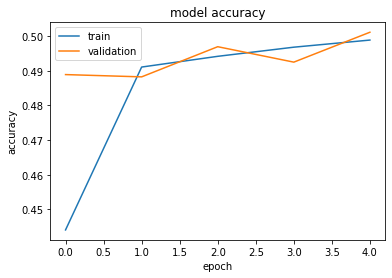

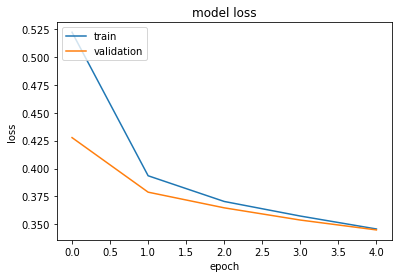

In [1]:
  
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
#hidden layer
hidden = Dense(64,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden)
hidden1 = Dense(32,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

#Input & Reconstructed
x_trans = x_test[0][np.newaxis]
prediction = autoencoder.predict(x_trans)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("Input")
plt.show()
plt.imshow(prediction.reshape(28, 28), cmap='gray')
plt.title("Reconstructed")
plt.show()

#Plotting accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Plotting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

DECODE

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.5339 - acc: 0.4428 - val_loss: 0.4594 - val_acc: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4296 - acc: 0.4870 - val_loss: 0.4065 - val_acc: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3997 - acc: 0.4906 - val_loss: 0.3882 - val_acc: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3842 - acc: 0.4934 - val_loss: 0.3723 - val_acc: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.3711 - acc: 0.4959 - val_loss: 0.3591 - val_acc: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3607 - acc: 0.4978 - val_loss: 0.3487 - val_acc: 0.0000e+00
Epoch 7/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3528 - acc: 0.4992 - va

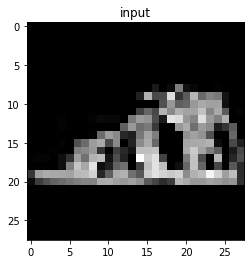

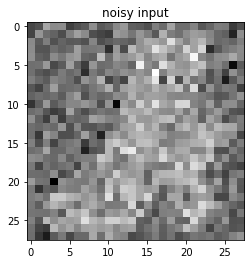

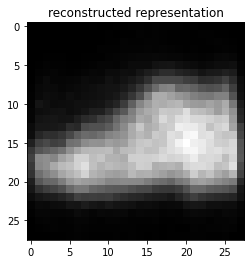

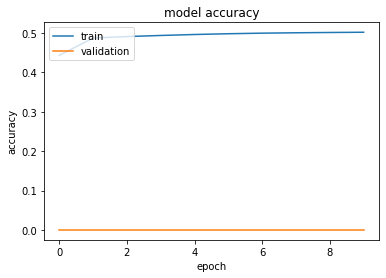

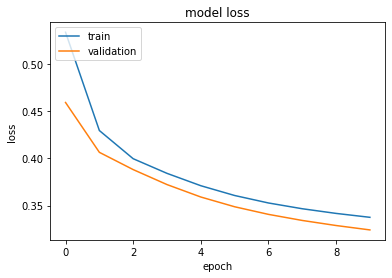

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

x_trans = x_test[11][np.newaxis]
x_noise_trans = x_train_noisy[11][np.newaxis]
prediction = autoencoder.predict(x_trans)

#Input, Noisy Input, Reconstructed Representation Plot
plt.imshow(x_test[11].reshape(28, 28), cmap='gray')
plt.title("input")
plt.show()
plt.imshow(x_noise_trans.reshape(28, 28), cmap='gray')
plt.title("noisy input")
plt.show()
plt.imshow(prediction.reshape(28, 28), cmap='gray')
plt.title("reconstructed representation")
plt.show()

#Accuracy & Loss Plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

BONUS

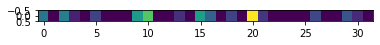

In [2]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

encoded_imgs = encoder.predict(x_test[[2],:])

plt.imshow(encoded_imgs)
plt.show()